In [1]:
import pandas as pd

train = pd.read_csv('datasets/titanic/train.csv')
X_test = pd.read_csv('datasets/titanic/test.csv')

X_train, y_train = train, train[['Survived']].squeeze()

In [2]:
df = train.copy()
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt

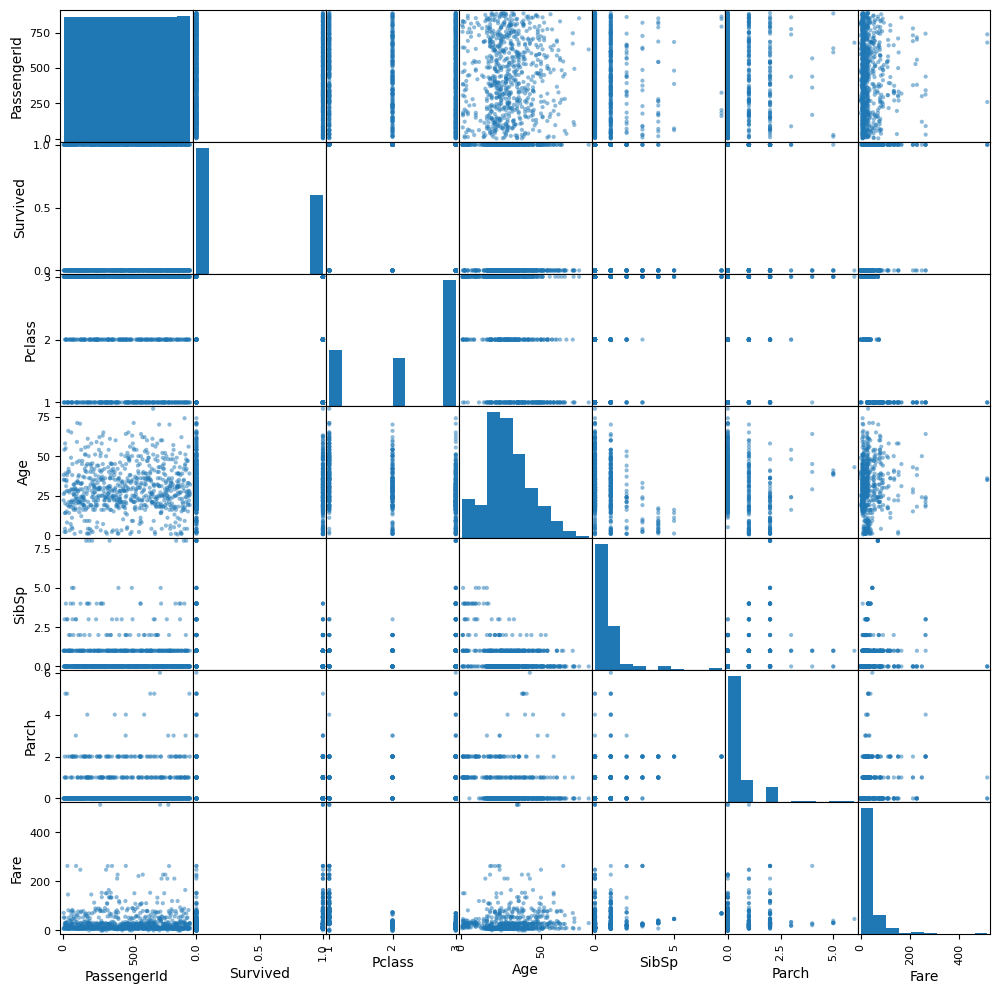

In [7]:
pd.plotting.scatter_matrix(frame=df.select_dtypes(include='number'), grid=True, alpha=0.5, figsize=(12,12))
plt.show()

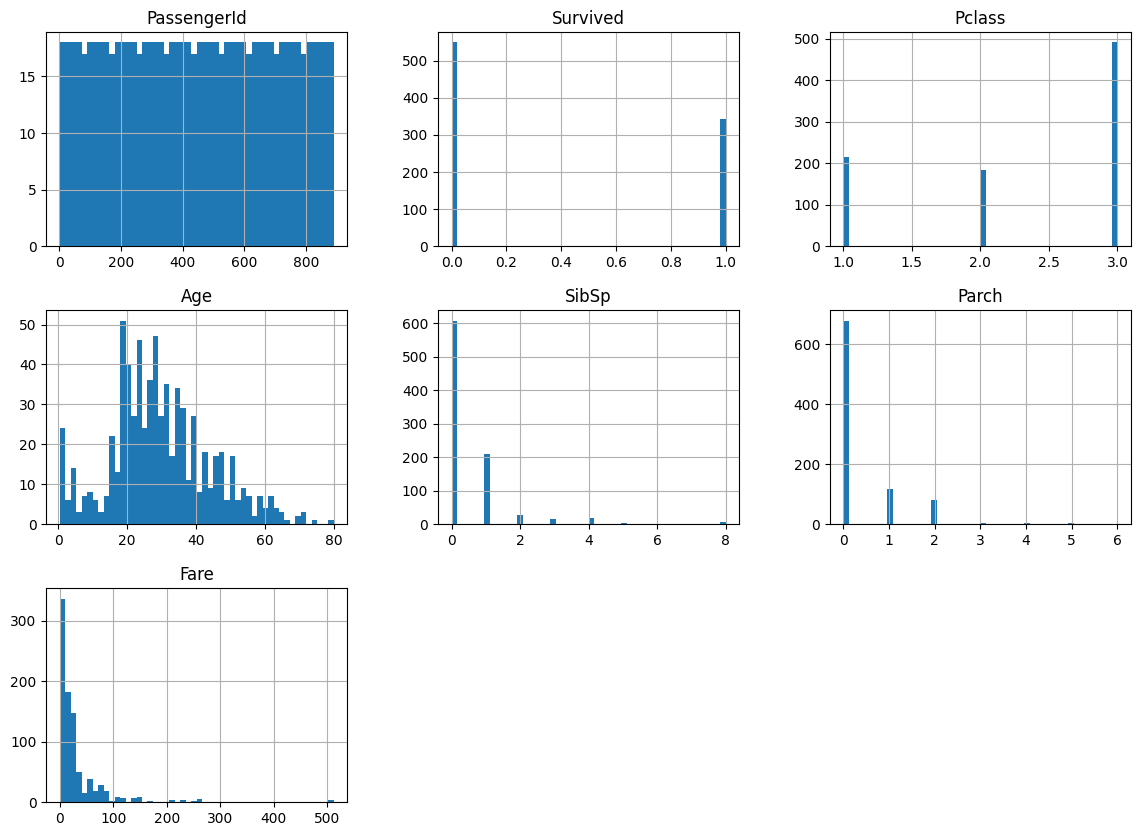

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(14, 10))
plt.show()

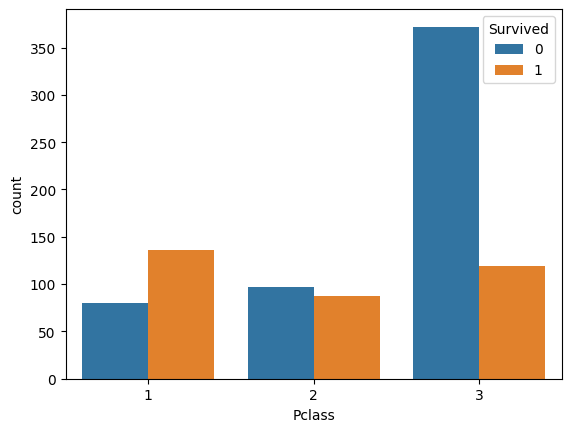

In [9]:
import seaborn as sns

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

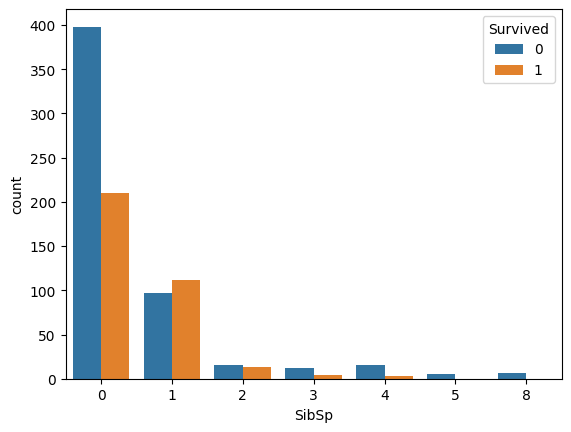

In [10]:
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.show()

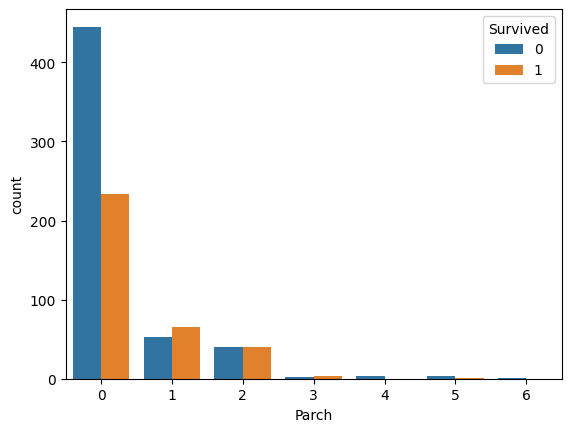

In [11]:
sns.countplot(data=df, x='Parch', hue='Survived')
plt.show()

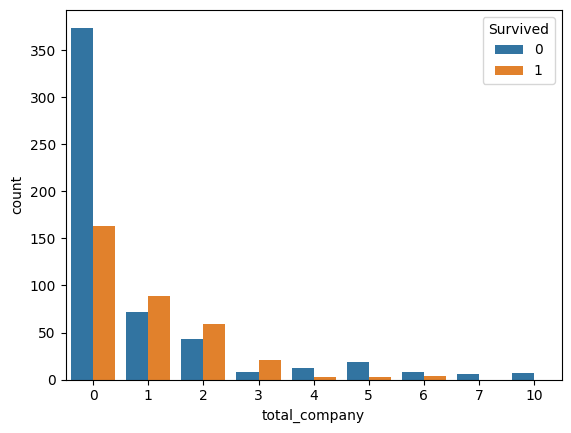

In [12]:
df['total_company'] = df['SibSp'] + df['Parch']
sns.countplot(data=df, x = 'total_company', hue='Survived')
plt.show()

# Inferences
- There are 891 rows.
- Age has 177 missing entries.
- Cabin has also 510 missing entries.
- Embarked has 2 missing entries.

## Data Cleaning

- Note that it is possible that we can use the names since there is SibSp column, which indicates the number of relatives or spouses/husbands aboard. It may indicate that the higher the number of company, the higher there is the chance to die.

### Name

In [13]:
df_name = df['Name']
df_name = df_name.str.split(',').str[0]

In [14]:
df_name.head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.assign(AgeBucket=pd.cut(df["Age"], bins=range(0, 90, 15), right=True))
df['survival'] = df.groupby('AgeBucket', observed=True)['Survived'].transform('mean')

In [16]:
df["AgeBucket"] = (df["Age"] // 15) * 15
df[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.337474
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [17]:
df_age = df['Age']
df_age.fillna(value=df_age.median(), inplace=True)

We also explore the probability of survival based on age. I guess we can divide the age into bins and see the percentage of people surviving.

### Embarked

In [18]:
df_embark = df['Embarked']
df_embark.fillna(df_embark.mode()[0], inplace=True)

### Sex

In [19]:
df_sex = df['Sex']
df_sex = df_sex.map({'male' : 0, 'female': 1})

### Company

In [20]:
df_company = df['SibSp'] + df['Parch']

## Create a Pipeline

In [21]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

import numpy as np

In [55]:
def total_company(transformer, feature_names_in):
    return np.array(['total_company'])

def family_size(transformer, feature_names_in):
    return ['FamilySize']

def alone(transformer, feature_names_in):
    return ['alone']

def mapping_sex(df):
    return df.iloc[:, 0].map({'male': 0, 'female': 1}).to_frame(name='Sex')

def get_title(df):
    return pd.DataFrame(
        df.iloc[:, 0].str.extract(r',\s*([^\.]+)\.')[0]
    )

def get_family_size(df):
    df['Surname'] = df['Name'].str.split(',').str[0]
    df['FamilySize'] = df.groupby('Surname')['Surname'].transform('count')
    return df[['FamilySize']]  # only return the column you want in pipeline

class SurvivalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.age_imputer_ = SimpleImputer(strategy='mean')
        self.survived_imputer_ = SimpleImputer(strategy='most_frequent')

    def fit(self, X, y=None):
        self.age_imputer_.fit(X[['Age']])
        self.survived_imputer_.fit(X[['Survived']])
        return self

    def transform(self, X):
        X_copy = X.copy()
        
        # Impute both Age and Survived columns first
        X_copy['Age'] = self.age_imputer_.transform(X_copy[['Age']])
        X_copy['Survived'] = self.survived_imputer_.transform(X_copy[['Survived']])
        
        # Create AgeBucket on the imputed age
        X_copy['AgeBucket'] = pd.cut(X_copy['Age'], bins=5, right=False)
        
        # Calculate survival rate for each age bucket
        X_copy['Survival'] = X_copy.groupby('AgeBucket', observed=True)['Survived'].transform('mean')
        
        return X_copy[['Survival']]

    def get_feature_names_out(self, input_features=None):
        return ['Survival']

class AloneTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.parch_imputer_ = SimpleImputer(strategy='most_frequent')
        self.sibsp_imputer_ = SimpleImputer(strategy='most_frequent')
    
    def fit(self, X, y=None):
        self.parch_imputer_.fit(X[['Parch']])
        self.sibsp_imputer_.fit(X[['SibSp']])
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['SibSp'] = self.sibsp_imputer_. transform(X[['SibSp']])
        X_copy['Parch'] = self.parch_imputer_.transform(X[['Parch']])

        X_copy['Is_alone'] = (X_copy['SibSp'] == 0) & (X_copy['Parch'] == 0)
        return X_copy[['Is_alone']]

    def get_feature_names_out(self, input_features = None):
        return ['Is_alone']

# New pipeline to use the fixed transformer
survival_pipeline_fixed = make_pipeline(SurvivalTransformer())
default_num_pipeline = make_pipeline(StandardScaler())
alone_pipeline = make_pipeline(AloneTransformer())

fare_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
age_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
embark_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))
family_size_pipeline = make_pipeline(FunctionTransformer(get_family_size, feature_names_out=family_size), StandardScaler())
survived_imputer = make_pipeline(SimpleImputer(strategy='most_frequent'))
title_name_pipeline = make_pipeline(FunctionTransformer(get_title, feature_names_out='one-to-one'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))
mapping_sex_transformer = FunctionTransformer(mapping_sex, feature_names_out='one-to-one')

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'total_company',
       'AgeBucket', 'survival'],
      dtype='object')

In [103]:
preprocessing = ColumnTransformer(
    [
        ('log1', fare_pipeline, ['Fare']),
        ('cat_title', title_name_pipeline, ['Name']),
        ('map', mapping_sex_transformer, ['Sex']),
        ('is_alone', alone_pipeline, ['SibSp', 'Parch']),
        ('sib', StandardScaler(), ['SibSp']),
        ('par', StandardScaler(), ['Parch']),
        #('cat_emb', embark_pipeline, ['Embarked']),
        #('total', family_size_pipeline, ['Name']),
        #('imputed', age_pipeline, ['Age']),
        #('survival_calc', survival_pipeline_fixed, ['Age', 'Survived']),
    ],
    remainder='drop'
)

df_prepared = preprocessing.fit_transform(X_train)

In [42]:
preprocessing.get_feature_names_out()

array(['log1__Fare', 'cat_title__Name_Capt', 'cat_title__Name_Col',
       'cat_title__Name_Don', 'cat_title__Name_Dr',
       'cat_title__Name_Jonkheer', 'cat_title__Name_Lady',
       'cat_title__Name_Major', 'cat_title__Name_Master',
       'cat_title__Name_Miss', 'cat_title__Name_Mlle',
       'cat_title__Name_Mme', 'cat_title__Name_Mr', 'cat_title__Name_Mrs',
       'cat_title__Name_Ms', 'cat_title__Name_Rev', 'cat_title__Name_Sir',
       'cat_title__Name_the Countess', 'map__Sex', 'is_alone__Is_alone',
       'sib__SibSp', 'par__Parch'], dtype=object)

In [46]:
df_prepared = pd.DataFrame(df_prepared, columns = preprocessing.get_feature_names_out(), index = X_train.index)
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   log1__Fare                    891 non-null    float64
 1   cat_title__Name_Capt          891 non-null    float64
 2   cat_title__Name_Col           891 non-null    float64
 3   cat_title__Name_Don           891 non-null    float64
 4   cat_title__Name_Dr            891 non-null    float64
 5   cat_title__Name_Jonkheer      891 non-null    float64
 6   cat_title__Name_Lady          891 non-null    float64
 7   cat_title__Name_Major         891 non-null    float64
 8   cat_title__Name_Master        891 non-null    float64
 9   cat_title__Name_Miss          891 non-null    float64
 10  cat_title__Name_Mlle          891 non-null    float64
 11  cat_title__Name_Mme           891 non-null    float64
 12  cat_title__Name_Mr            891 non-null    float64
 13  cat_t

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.svm import SVC

In [104]:
sgd_clf = make_pipeline(preprocessing, SGDClassifier(random_state=42))
sgd_clf.fit(X_train, y_train)

scores = cross_val_score(sgd_clf, X_train, y_train, cv=10)
print('sgd_performance', scores.mean())

random_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
random_clf.fit(X_train, y_train)

print('random_clf score', cross_val_score(random_clf, X_train, y_train, cv=10).mean())

svc_clf = make_pipeline(preprocessing, SVC(gamma='auto'))
svc_clf.fit(X_train, y_train)
scores = cross_val_score(svc_clf, X_train, y_train, cv=10)
print('svc_clf', scores.mean())

knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())
knn_clf.fit(X_train, y_train)
scores = cross_val_score(knn_clf, X_train, y_train, cv=10)
print('knn_clf', scores.mean())

gaussion_nb_clf = make_pipeline(preprocessing, GaussianNB())
gaussion_nb_clf.fit(X_train, y_train)
scores = cross_val_score(knn_clf, X_train, y_train, cv=10)
print('gaussian_clf', scores.mean())

dec_tree_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
dec_tree_clf.fit(X_train, y_train)
print('dec_tree', cross_val_score(dec_tree_clf, X_train, y_train, cv=10).mean())

lineac_svc = make_pipeline(preprocessing, LinearSVC(random_state=42))
lineac_svc.fit(X_train, y_train)
print('linear_svc', cross_val_score(lineac_svc, X_train, y_train, cv=10).mean())

perceptron = make_pipeline(preprocessing, Perceptron(random_state=42))
perceptron.fit(X_train, y_train)
print('perceptron', cross_val_score(perceptron, X_train, y_train, cv=10).mean())

logreg = make_pipeline(preprocessing, LogisticRegression(random_state=42))
logreg.fit(X_train, y_train)
print('logreg', cross_val_score(logreg, X_train, y_train, cv=10).mean())

gb_clf = make_pipeline(preprocessing, GradientBoostingClassifier(random_state=42))
gb_clf.fit(X_train, y_train)
print('gb_clf', cross_val_score(gb_clf, X_train, y_train, cv=10).mean())

sgd_performance 0.7968539325842696
random_clf score 0.8103745318352059
svc_clf 0.8316479400749064
knn_clf 0.8350811485642946
gaussian_clf 0.8350811485642946
dec_tree 0.8193508114856429
linear_svc 0.8181897627965045
perceptron 0.7273533083645443
logreg 0.8204244694132334
gb_clf 0.8226716604244695


In [105]:
predict = gb_clf.predict(X_test)

In [106]:
predict_df = pd.DataFrame(predict, columns=['prediction'])

In [107]:
predict_df.mean()

prediction    0.370813
dtype: float64